In [1]:
# Regression Models
%matplotlib inline
#%matplotlib widget
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from collections import Counter
from lightgbm import LGBMRegressor
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor,
RandomForestRegressor, VotingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor, StackingRegressor)

# Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder, MinMaxScaler, PolynomialFeatures

# model_selection
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, 
learning_curve, cross_val_predict, cross_validate, permutation_test_score, validation_curve, RandomizedSearchCV)

# Metrics
from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report, f1_score)

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 

In [2]:
df = pd.read_csv('yearly-water-usage.csv', engine='pyarrow')
df.head()

,Year,Water
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [3]:
# Lowering columns
df.columns = df.columns.str.lower() 

In [5]:
missing_values = df.isna().sum()

if len(missing_values) < 0:
    print("❌ Missing data for following columns:")
else:
    print(f"✅ No missing values for df:\n{missing_values}") 

✅ No missing values for df:
year     0
water    0
dtype: int64


In [8]:
# Group by multiple columns
max_water_usage_by_year = df.groupby(['year'])[['water']]\
    .max().sort_values(by='water', ascending=False)  

min_water_usage_by_year = df.groupby(['year'])[['water']]\
    .min().sort_values(by='water', ascending=True)  

In [7]:
max_water_usage_by_year

,water
year,
1913,662
1914,651
1943,640
1946,632
1942,628
...,...
1893,390
1886,386
1894,360


In [9]:
min_water_usage_by_year

,water
year,
1892,344
1885,356
1894,360
1886,386
1893,390
...,...
1942,628
1946,632
1943,640


In [20]:
print(f"The year with the least water usage was 1892 with a comsuption of 334\n")
print(f"The year with the most water usage was 1913 with a comsuption of 662")

The year with the least water usage was 1892 with a comsuption of 334

The year with the most water usage was 1913 with a comsuption of 662


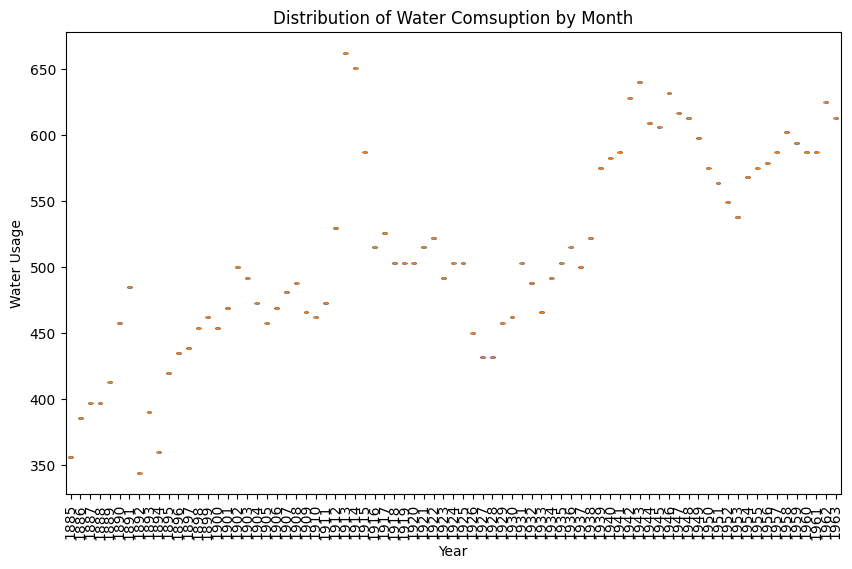

In [29]:
# Method 1: Using pandas groupby (recommended)
plt.figure(figsize=(10, 6))
data_grouped = [df[df['year'] == size]['water'] for size in df['year'].unique()]
plt.boxplot(data_grouped, tick_labels=df['year'].unique(), patch_artist=True)
plt.title('Distribution of Water Comsuption by Month')
plt.xlabel('Year')
plt.ylabel('Water Usage')
plt.xticks(rotation=90)
plt.show()   

In [4]:
df

,year,water
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413
...,...,...
74,1959,594
75,1960,587
76,1961,587
77,1962,625
